In [91]:
import numpy as np 
import pandas as pd 
import re,nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [92]:
import string
from string import punctuation
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [93]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [94]:
df = pd.read_csv("J:/Data science/data/NLP/airline tweets.csv")

In [95]:
df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,Tr_tweet_1,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0.0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,Tr_tweet_2,positive,0.3486,NaN,0.0,Virgin America,jnardino,0.0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [96]:
df.shape

(3339, 12)

In [97]:
df.airline.value_counts()

United            2884
Virgin America     454
Name: airline, dtype: int64

In [98]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


<AxesSubplot:ylabel='airline'>

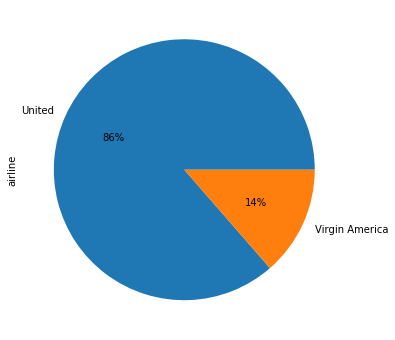

In [99]:
df.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot:ylabel='airline_sentiment'>

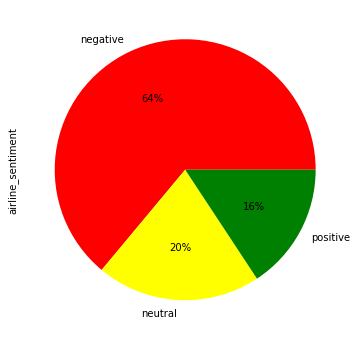

In [100]:

df.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow" ,"green"])

In [101]:
df['airline'].head()

0    Virgin America
1    Virgin America
2    Virgin America
3    Virgin America
4    Virgin America
Name: airline, dtype: object

In [102]:
df['airline_sentiment'].head()

0     neutral
1    positive
2     neutral
3    negative
4    negative
Name: airline_sentiment, dtype: object

<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

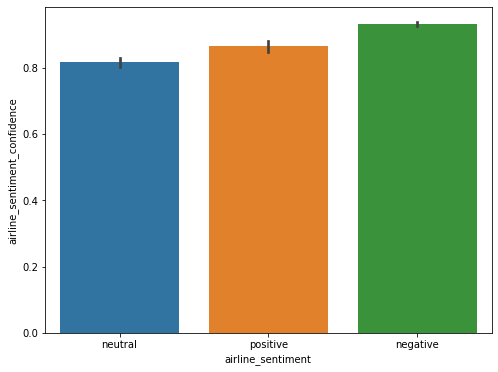

In [103]:
sns.barplot(data=df,x="airline_sentiment" , y="airline_sentiment_confidence")

In [104]:
df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,Tr_tweet_1,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0.0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,Tr_tweet_2,positive,0.3486,NaN,0.0,Virgin America,jnardino,0.0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [105]:
x = df['text']
y = df['airline_sentiment'] 

In [106]:
import re

In [124]:
def clean_text(text):
    text = "".join([re.sub(r'\W',' ' ,str(text))])
    
    text= "".join([re.sub(r'\s+[a-zA-Z]\s+', ' ', text)])
    # remove all single characters
    text= "".join([re.sub(r'\s+[a-zA-Z]\s+', ' ', text)])

    # Remove single characters from the start
    text = "".join([re.sub(r'\^[a-zA-Z]\s+', ' ', text)])

    # Substituting multiple spaces with single space
    text = "".join([re.sub(r'\s+', ' ', text, flags=re.I)])

    # Removing prefixed 'b'
    text = "".join([re.sub(r'^b\s+', '', text)])

    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    text = " ".join([lemma.lemmatize(word) for word in tokens if word not in stop_words])
    return text

In [108]:
# clean_text(x)

In [127]:
df['cleaned_text'] = df['text'].apply(lambda f:clean_text(f))

In [128]:
df['text'].head(15)

0                   @VirginAmerica What @dhepburn said.
1     @VirginAmerica plus you've added commercials t...
2     @VirginAmerica I didn't today... Must mean I n...
3     @VirginAmerica it's really aggressive to blast...
4     @VirginAmerica and it's a really big bad thing...
5     @VirginAmerica seriously would pay $30 a fligh...
6     @VirginAmerica yes, nearly every time I fly VX...
7       @virginamerica Well, I didn't…but NOW I DO! :-D
8     @VirginAmerica it was amazing, and arrived an ...
9                                  @VirginAmerica I &lt
10    @VirginAmerica This is such a great deal! Alre...
11                               @VirginAmerica Thanks!
12        @VirginAmerica SFO-PDX schedule is still MIA.
13    @VirginAmerica So excited for my first cross c...
14                      I ❤️ flying @VirginAmerica. ☺️👍
Name: text, dtype: object

In [129]:
df['cleaned_text_1'].head(15)

0                           virginamerica dhepburn said
1     virginamerica plus added commercial experience...
2     virginamerica today must mean need take anothe...
3     virginamerica really aggressive blast obnoxiou...
4                    virginamerica really big bad thing
5     virginamerica seriously would pay 30 flight se...
6     virginamerica yes nearly every time fly vx ear...
7                                    virginamerica well
8         virginamerica amazing arrived hour early good
9                                      virginamerica lt
10    virginamerica great deal already thinking 2nd ...
11                                 virginamerica thanks
12             virginamerica sfo pdx schedule still mia
13    virginamerica excited first cross country flig...
14                                 flying virginamerica
Name: cleaned_text_1, dtype: object

In [130]:
tfidf = TfidfVectorizer()
matrix = tfidf.fit_transform(df['cleaned_text'])

In [131]:
x_train, x_test, y_train, y_test = train_test_split(matrix, y, test_size=0.3, random_state=42)

In [132]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [133]:
confusion_matrix(y_test,y_pred)

array([[625,   7,   2],
       [171,  23,   1],
       [110,  10,  53]], dtype=int64)

In [134]:
accuracy_score(y_test,y_pred)

0.6996007984031936